
211. Design Add and Search Words Data Structure

Design a data structure that supports adding new words and finding if a string matches any previously added string.

Implement the WordDictionary class:

WordDictionary() Initializes the object.
void addWord(word) Adds word to the data structure, it can be matched later.
bool search(word) Returns true if there is any string in the data structure that matches word or false otherwise. word may contain dots '.' where dots can be matched with any letter.
 

Example:

Input
["WordDictionary","addWord","addWord","addWord","search","search","search","search"]
[[],["bad"],["dad"],["mad"],["pad"],["bad"],[".ad"],["b.."]]
Output
[null,null,null,null,false,true,true,true]

Explanation
WordDictionary wordDictionary = new WordDictionary();
wordDictionary.addWord("bad");
wordDictionary.addWord("dad");
wordDictionary.addWord("mad");
wordDictionary.search("pad"); // return False
wordDictionary.search("bad"); // return True
wordDictionary.search(".ad"); // return True
wordDictionary.search("b.."); // return True
 

Constraints:

1 <= word.length <= 25
word in addWord consists of lowercase English letters.
word in search consist of '.' or lowercase English letters.
There will be at most 2 dots in word for search queries.
At most 104 calls will be made to addWord and search.

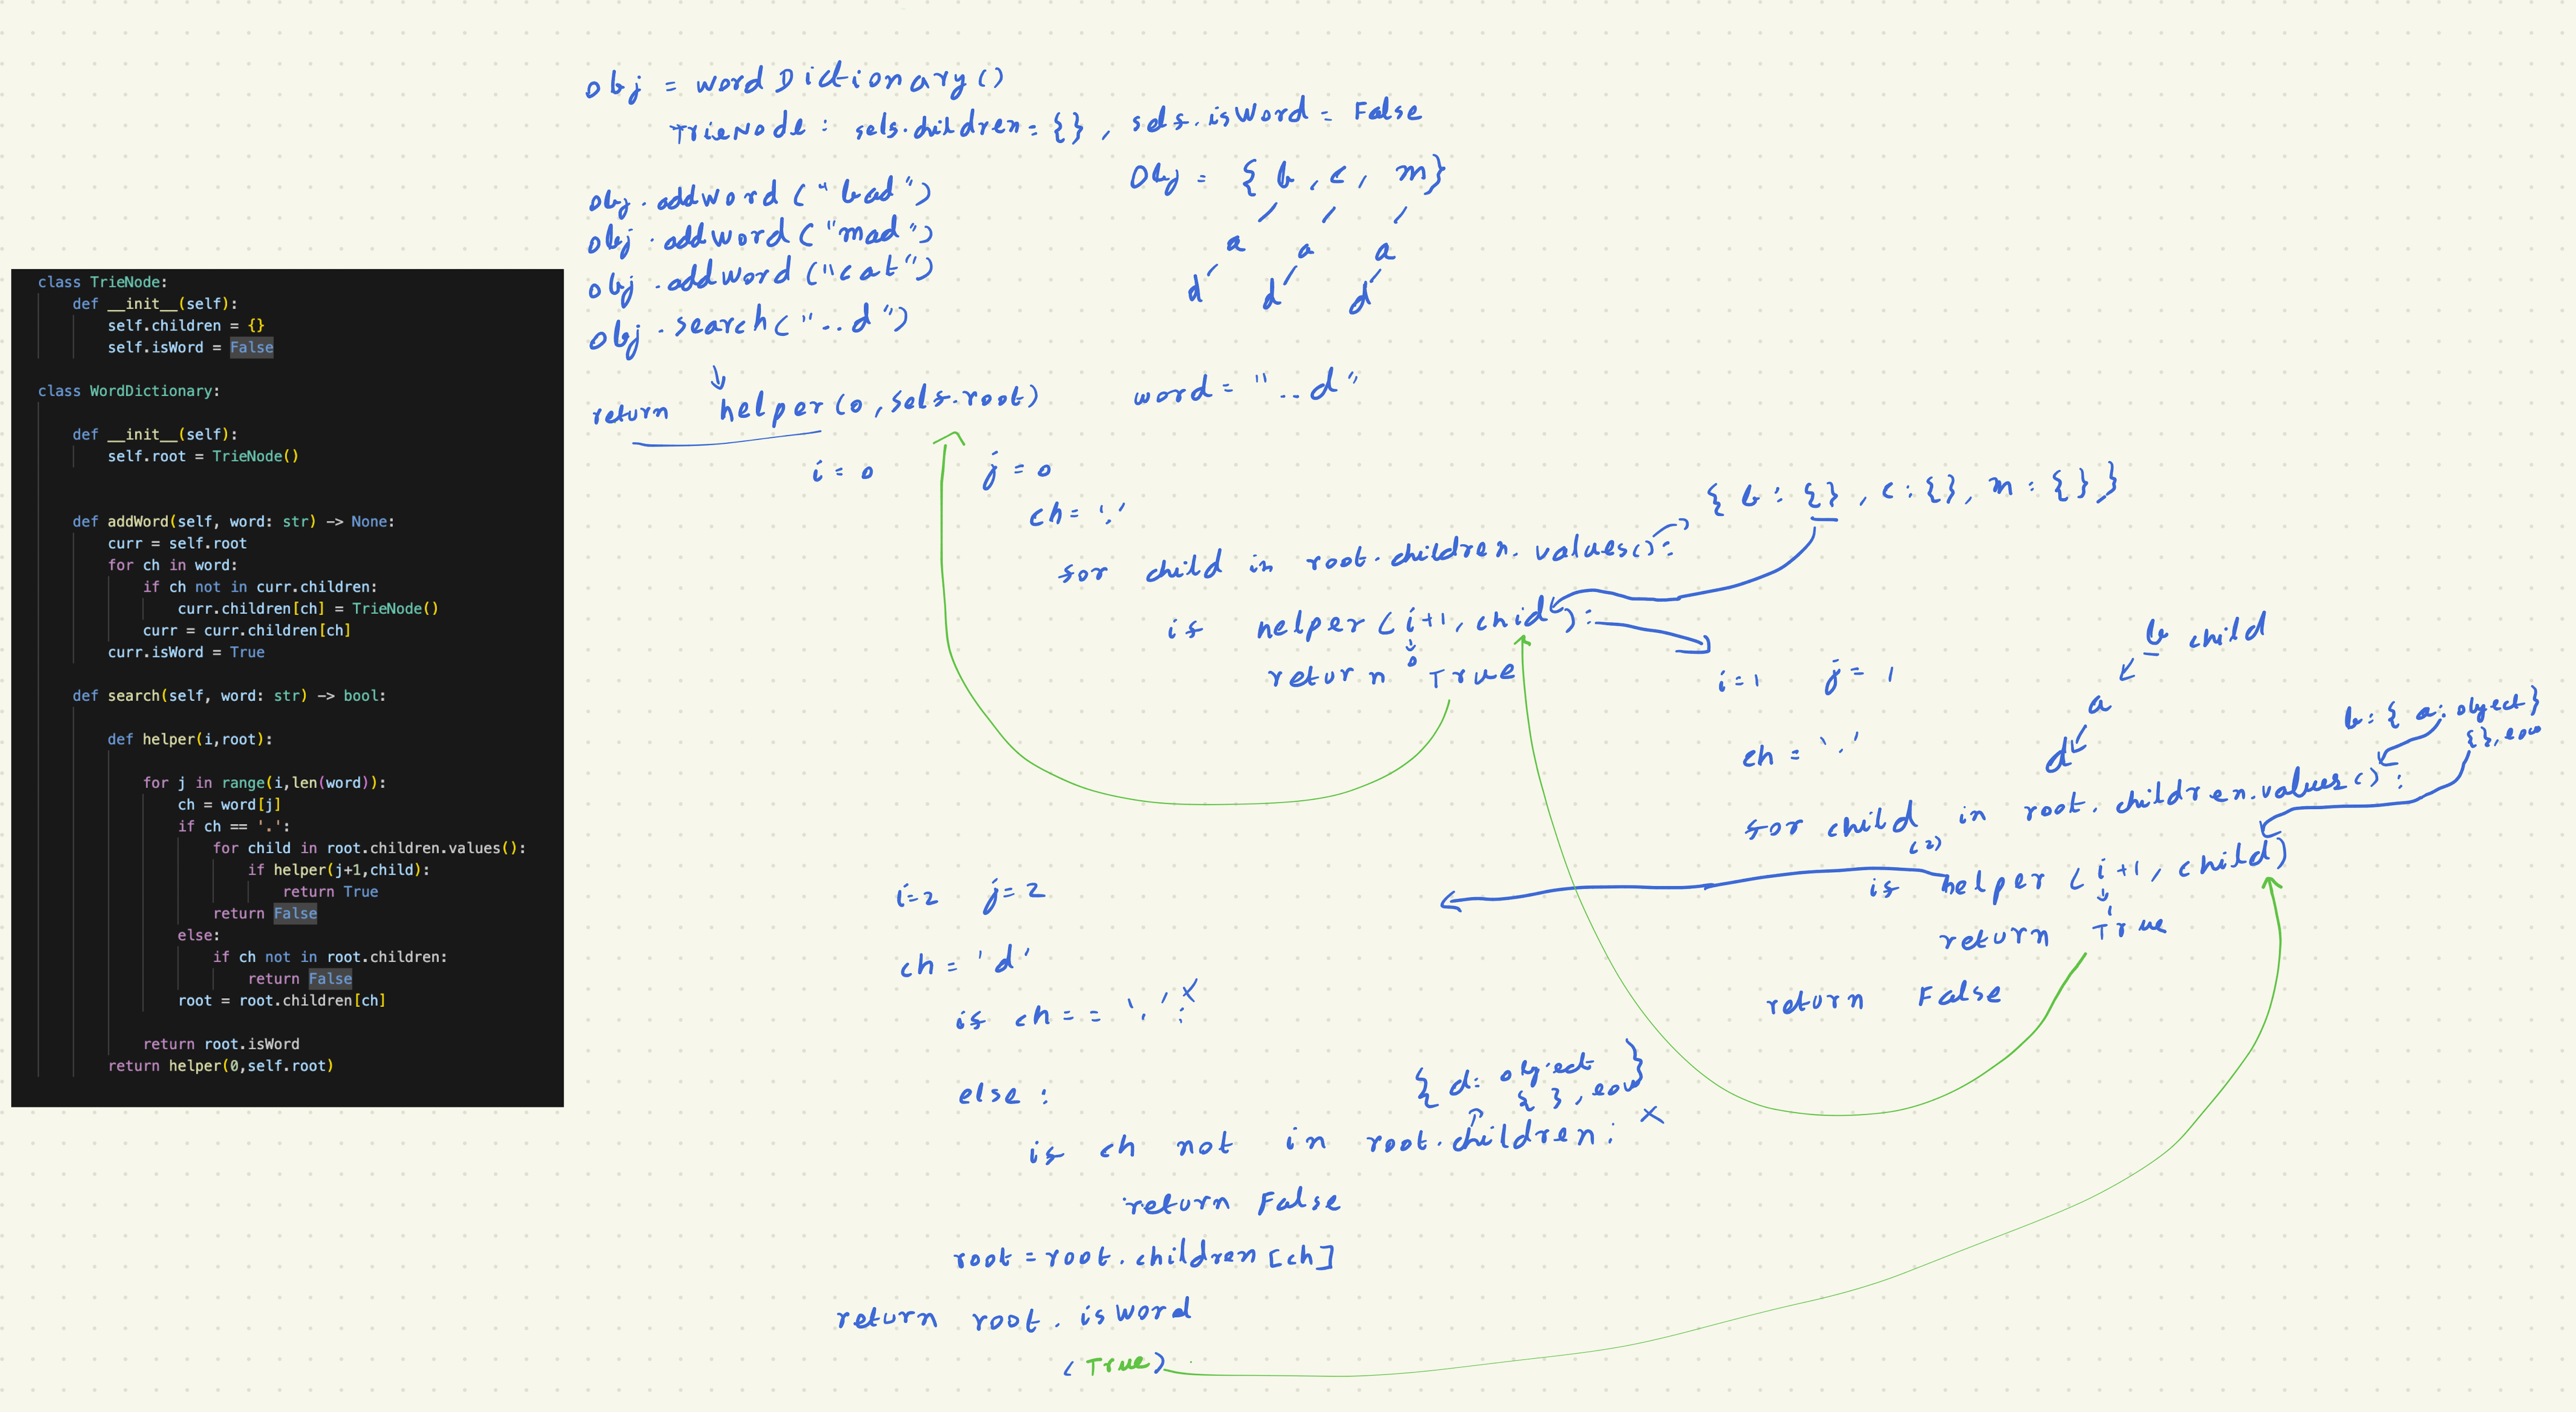


Requiremnt:- Design a word and search dictionary
in addWord function store the inputs

in search function return if any word in dictionary matches the given target word pattern and '.' is a wildcard, it can match with any char
return if that is a end of word

Intuition:-
for creating the dictionary refer back to LC 208

For search:-
    the issue here is '.' char, whe '.' char exist we need to accept any char and look further. So an index or '.' char we nee to look at 26 alphabet possiblities

    for example: search('..d')
        here we need to first seach for 26 possiblities(if the other 26 char exist in the children), 
        for each char again seach for 26 possiblities(if the other 26 char exist in the children)
        then we need to look out if 'd' exist the children, if exist and 'd' and its end of a word, return True

        even after iterating through all possiblities and not found any word matching the tatget word or not marking end of word return False

        we will be doing the above approch in recursive way

        Here in the below code when we have ch == '.', instead of checking root.children[ch], we are recursively checking each child object in {a:child,b:child....}
                if ch == '.':
                    for child in root.children.values():
                        if helper(j+1,child):
                            return True
                    return False

In [1]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.isWord = False

class WordDictionary:

    def __init__(self):
        self.root = TrieNode()
        

    def addWord(self, word: str) -> None:
        curr = self.root
        for ch in word:
            if ch not in curr.children:
                curr.children[ch] = TrieNode()
            curr = curr.children[ch]
        curr.isWord = True

    def search(self, word: str) -> bool:
        
        def helper(i,root):

            for j in range(i,len(word)):
                ch = word[j]
                if ch == '.':
                    for child in root.children.values():
                        if helper(j+1,child):
                            return True
                    return False
                else:
                    if ch not in root.children:
                        return False
                root = root.children[ch]

            return root.isWord
        return helper(0,self.root)


obj = WordDictionary()
obj.addWord('bad')
obj.search('.ad')
    

True

In [2]:
#works but time limit exceeded:
"""
Requirement: Design Data structure to store a word and check if the word lredy exist
In search function if '.' is given, then it can accept any word ot tha indx

Intuition: The input words can be stored in a set to avoid duplicate words

in search we will get the argument term and we will stoart iterating through the words that is stored in set
Also a foundWord bool is also declared t False, when innr loop completes and if still remains True, then will return True
When word excatly matches the same length, then will start checking word by word
word and term's chr matches or the term's ch at indx is '.', then we will set foundWord to True
else set it to False and break the current inner loop

if no word matches, return False
"""

class WordDictionary:

    def __init__(self):
        self.store = set()
        
    def addWord(self, word: str) -> None:
        self.store.add(word)

    def search(self, term: str) -> bool:
        
        for word in self.store:
            if len(word) != len(term):
                continue

            foundWord = False
            for i in range(len(term)):
                if word[i] == term[i] or term[i] == '.':
                    foundWord = True
                else:
                    foundWord = False
                    break
            if foundWord:
                return True
        return False
        


# Your WordDictionary object will be instantiated and called as such:
# obj = WordDictionary()
# obj.addWord(word)
# param_2 = obj.search(word)
        
obj = WordDictionary()
obj.addWord('bad')
obj.search('.ad')

True